# Transfer learning with pretrained Keras models

Although Kernel resources were increased recently we still can not train useful CNNs without GPU. The original ImageNet set has quite a few different dog classes so we can reuse CNNs with pretrained ImageNet weights. Fortunately prediction is much faster (<1s/image) making it possible to run meaningful experiments with Kaggle Kernels.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/keras-pretrained-models/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5
/kaggle/input/keras-pretrained-models/xception_weights_tf_dim_ordering_tf_kernels.h5
/kaggle/input/keras-pretrained-models/imagenet_class_index.json
/kaggle/input/keras-pretrained-models/resnet50_weights_tf_dim_ordering_tf_kernels.h5
/kaggle/input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels.h5
/kaggle/input/keras-pretrained-models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/keras-pretrained-models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/keras-pretrained-models/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/keras-pretrained-models/Kuszma.JPG
/kaggle/input/dog-breed-identification/sample_submission.csv
/kag

/kaggle/input/dog-breed-identification/test/b0c6220d92fb287b9bbee93b28305830.jpg
/kaggle/input/dog-breed-identification/test/44c9af2f490ea6d39494a348e4cc89c6.jpg
/kaggle/input/dog-breed-identification/test/a4535ef131c003f86ba1379591c44bc3.jpg
/kaggle/input/dog-breed-identification/test/dd703c7beeaf5cba5533d5f42b608f2e.jpg
/kaggle/input/dog-breed-identification/test/7308c95772b943b4603d4d48c4d9f058.jpg
/kaggle/input/dog-breed-identification/test/5327f542d73d60a2ea17335a210a2f84.jpg
/kaggle/input/dog-breed-identification/test/8935ed11d71e8b349b010f715a1a790c.jpg
/kaggle/input/dog-breed-identification/test/3bb5b0beec0daeeb1d45f8009c27741c.jpg
/kaggle/input/dog-breed-identification/test/43de95b59bbd14661336d2abcbe216ae.jpg
/kaggle/input/dog-breed-identification/test/ca89281d3e407cf13d29ab46bd7bdf1a.jpg
/kaggle/input/dog-breed-identification/test/81aef7ac5a174191b4e0ac53c23136f5.jpg
/kaggle/input/dog-breed-identification/test/82f07a63a1f03ff9d8e0f4a8458caa93.jpg
/kaggle/input/dog-breed-iden

/kaggle/input/dog-breed-identification/test/dd3ac0ab0e9328f1f4c1692947c17c09.jpg
/kaggle/input/dog-breed-identification/test/5d1e5ef0fb32ab0d0c0abadcfb3541b9.jpg
/kaggle/input/dog-breed-identification/test/09ef5442c370eb7eeb08e6796c5ff5b5.jpg
/kaggle/input/dog-breed-identification/test/d48d1fbe42a07cc8df4fbbcc883fed1c.jpg
/kaggle/input/dog-breed-identification/test/a743d539375287ba72ddf544f1084afa.jpg
/kaggle/input/dog-breed-identification/test/0e1ea29028a5b914632b0c30ecf4d3ee.jpg
/kaggle/input/dog-breed-identification/test/a8e25d59fd9994ce3044ebcec0b058b1.jpg
/kaggle/input/dog-breed-identification/test/48fe589e1986cc099c2f543b8d9ba1cf.jpg
/kaggle/input/dog-breed-identification/test/486f3cc1d1324b8633278ef97719cab6.jpg
/kaggle/input/dog-breed-identification/test/784116be4dd40467aefba9af5e503597.jpg
/kaggle/input/dog-breed-identification/test/7d3a1066521da895f915af31e8e739df.jpg
/kaggle/input/dog-breed-identification/test/3c3ad98c98b7237b83607b5bfcff0fd0.jpg
/kaggle/input/dog-breed-iden

/kaggle/input/dog-breed-identification/test/b9246b71e7cd67f936b838ec3323e39f.jpg
/kaggle/input/dog-breed-identification/test/87631e3e55ce202a2a3f516bf8ac81a9.jpg
/kaggle/input/dog-breed-identification/test/1b176552396034ed1c864c3adb6cd16e.jpg
/kaggle/input/dog-breed-identification/test/0fc9788c669fafe1f5c5a6da882d6356.jpg
/kaggle/input/dog-breed-identification/test/079a40f22b0fad9a66f76797b62bb930.jpg
/kaggle/input/dog-breed-identification/test/b2a9c719a2cbccbc327c1542e10f441b.jpg
/kaggle/input/dog-breed-identification/test/96133814ba7c2eee0550be2b8ab6a902.jpg
/kaggle/input/dog-breed-identification/test/e6b2cfafb8c0a06c062832369365fa9e.jpg
/kaggle/input/dog-breed-identification/test/feacb43d576eb6d78b38d4eb835d7b20.jpg
/kaggle/input/dog-breed-identification/test/9f5755ec65e8e95409569e4de1c0614c.jpg
/kaggle/input/dog-breed-identification/test/61e105759437e35bcb9630bca0e6bc7d.jpg
/kaggle/input/dog-breed-identification/test/5579bcb5644ac7d77545bb65173df56c.jpg
/kaggle/input/dog-breed-iden

/kaggle/input/dog-breed-identification/test/6371f236cb3596b625bec5b72ff63cbf.jpg
/kaggle/input/dog-breed-identification/test/1c3096504b2d7c2f606c32bdfe540890.jpg
/kaggle/input/dog-breed-identification/test/deaf748bed865ec76758f086db04bfac.jpg
/kaggle/input/dog-breed-identification/test/6b8d430bc75a9b3de737ddb6ddc28861.jpg
/kaggle/input/dog-breed-identification/test/8751ca428642432846491b6cbcac2588.jpg
/kaggle/input/dog-breed-identification/test/6c4a4565e1d0906cb370d01efe64ac16.jpg
/kaggle/input/dog-breed-identification/test/cd9647853458c4fd67e4057379d5e4ca.jpg
/kaggle/input/dog-breed-identification/test/069b5a158f61f32d6b43964395beaa49.jpg
/kaggle/input/dog-breed-identification/test/496e85b1192c522cae8b0a7919ff6ae9.jpg
/kaggle/input/dog-breed-identification/test/7d08bbe4d430bd06f93ab17d94acf1f3.jpg
/kaggle/input/dog-breed-identification/test/8a664cfab6a707829de93defe6e37177.jpg
/kaggle/input/dog-breed-identification/test/0f3dc83b50a8405f6079ad13c4b727e6.jpg
/kaggle/input/dog-breed-iden

/kaggle/input/dog-breed-identification/test/115207097231aeb2bd45ff9a87b97018.jpg
/kaggle/input/dog-breed-identification/test/0da09e8ff1c1fe09c4ff0b18f01f3c70.jpg
/kaggle/input/dog-breed-identification/test/f8c3fb7b00c96ba6881125d7ab0f7bf9.jpg
/kaggle/input/dog-breed-identification/test/53a1dbac12a4a509f51f72c9a3e2f158.jpg
/kaggle/input/dog-breed-identification/test/57febab02547933c7fa21ee086bd900c.jpg
/kaggle/input/dog-breed-identification/test/e806fbb5ca4dd3a094f7819bd810cc65.jpg
/kaggle/input/dog-breed-identification/test/cff3b5c499c24d2d93074628a3b27362.jpg
/kaggle/input/dog-breed-identification/test/13b6f9b3dcbab9a4ba4b5c3de3cd5f6f.jpg
/kaggle/input/dog-breed-identification/test/d9b0c0bc4de8b19e3452fc477ebdf5a6.jpg
/kaggle/input/dog-breed-identification/test/45fa1e1a64eec96e6990e7c24badc24e.jpg
/kaggle/input/dog-breed-identification/test/e47de0441a48f2eff7c2faacd350ed06.jpg
/kaggle/input/dog-breed-identification/test/d50aee8c0bf819b889dc756dabe709fb.jpg
/kaggle/input/dog-breed-iden

/kaggle/input/dog-breed-identification/train/726ca22c7c9c7b1043c7563a5a494cf9.jpg
/kaggle/input/dog-breed-identification/train/120e665f7fa566a429d27ad920fc34da.jpg
/kaggle/input/dog-breed-identification/train/fc338aa6f2ba965bb7be53584ca0b4e0.jpg
/kaggle/input/dog-breed-identification/train/acca62cebd23de23384fd8c95d381b0f.jpg
/kaggle/input/dog-breed-identification/train/6b823afef10535744271064bc6666530.jpg
/kaggle/input/dog-breed-identification/train/4b6fc496a48879b319e7a7f28e57b77b.jpg
/kaggle/input/dog-breed-identification/train/e917bb5669e0c273eb16304af1f69e1d.jpg
/kaggle/input/dog-breed-identification/train/00a338a92e4e7bf543340dc849230e75.jpg
/kaggle/input/dog-breed-identification/train/8d77611798e17dc31a663fae87f46a14.jpg
/kaggle/input/dog-breed-identification/train/8c6cd1ae33852154187c467495911011.jpg
/kaggle/input/dog-breed-identification/train/a1891d8dc13175e926eeb5a217098755.jpg
/kaggle/input/dog-breed-identification/train/4692cab8ff2ff0912c912260602ca1c5.jpg
/kaggle/input/do

/kaggle/input/dog-breed-identification/train/6e6cb711d60ba4af0d18224abc2c45ac.jpg
/kaggle/input/dog-breed-identification/train/838f27799a1ed487d9f48d7a49a047b3.jpg
/kaggle/input/dog-breed-identification/train/81662662eb22135f0438459487722f98.jpg
/kaggle/input/dog-breed-identification/train/b3ce58830523907af62e0069e081bc71.jpg
/kaggle/input/dog-breed-identification/train/a2d67239a3ca734a0d30fecf7047e649.jpg
/kaggle/input/dog-breed-identification/train/39bc999339e2e389c67e29838b5b1e68.jpg
/kaggle/input/dog-breed-identification/train/d974d73918177dd97349f07bff519f3e.jpg
/kaggle/input/dog-breed-identification/train/fba73e53151cb751f9c22e63de669923.jpg
/kaggle/input/dog-breed-identification/train/768493a604476da27e6746a906a4f498.jpg
/kaggle/input/dog-breed-identification/train/584a27a01ea4e54d777424d906385c1b.jpg
/kaggle/input/dog-breed-identification/train/7616151df0a316bef96662cffbae0efa.jpg
/kaggle/input/dog-breed-identification/train/037ac6cbd9c96d70e68917aa059b6aab.jpg
/kaggle/input/do

/kaggle/input/dog-breed-identification/train/60a9aafef2834e389fde21293e41406b.jpg
/kaggle/input/dog-breed-identification/train/3abf32c83667f356c2f38994e0477a2b.jpg
/kaggle/input/dog-breed-identification/train/28f673b778e6f4cb974dc332fcb1ee1d.jpg
/kaggle/input/dog-breed-identification/train/91984e95858f522d6a29150813453e7e.jpg
/kaggle/input/dog-breed-identification/train/69f0ad7b0b8ca686c1636067726a05e2.jpg
/kaggle/input/dog-breed-identification/train/2b4e24996bd70174a4ecb6990a3d8204.jpg
/kaggle/input/dog-breed-identification/train/d49881b37b1528c52dc418d03d81823f.jpg
/kaggle/input/dog-breed-identification/train/e0629e36f6f2f4708db4b4d68bf1a75e.jpg
/kaggle/input/dog-breed-identification/train/012ff2d21dad14452ea16b4cda7eef4c.jpg
/kaggle/input/dog-breed-identification/train/04c3bdfec0c7f082c7e697c26be9e020.jpg
/kaggle/input/dog-breed-identification/train/584cd71118e2b4da3193bf3b4269b159.jpg
/kaggle/input/dog-breed-identification/train/0e79be614f12deb4f7cae18614b7391b.jpg
/kaggle/input/do

/kaggle/input/dog-breed-identification/train/9347a734a6475b2cd88c24700260881f.jpg
/kaggle/input/dog-breed-identification/train/5378e91b030e6018711e6eeffb45d61c.jpg
/kaggle/input/dog-breed-identification/train/bd67952d62b23e87a420c8c80fd99756.jpg
/kaggle/input/dog-breed-identification/train/24dba573c683eb299eb3b3a4c5ee353d.jpg
/kaggle/input/dog-breed-identification/train/8e3b7695d93b91002370bdc9d01bfcfb.jpg
/kaggle/input/dog-breed-identification/train/8470a6fdf4db9b088494aaa9384ba9d0.jpg
/kaggle/input/dog-breed-identification/train/d739b294a3652ef517b86d9b79770910.jpg
/kaggle/input/dog-breed-identification/train/f6e186742c1885a3c4a66396195d8a18.jpg
/kaggle/input/dog-breed-identification/train/80a4a8827e7bd85603b6f0aca9bfebec.jpg
/kaggle/input/dog-breed-identification/train/61cbb86183b0c0253b3aa2fb234b8776.jpg
/kaggle/input/dog-breed-identification/train/ee1ce2280494dc07f516970abee34d55.jpg
/kaggle/input/dog-breed-identification/train/f75b13d14f950f2a6acf1f907bdfc636.jpg
/kaggle/input/do

/kaggle/input/dog-breed-identification/train/445263c4349c957b9d2a87f5646699c1.jpg
/kaggle/input/dog-breed-identification/train/123ffeb6b374097856bffdd11b693668.jpg
/kaggle/input/dog-breed-identification/train/09beb7445a14486752bd25f69e952ebc.jpg
/kaggle/input/dog-breed-identification/train/ddcf9049e60ad86952d8298ee6ab7f58.jpg
/kaggle/input/dog-breed-identification/train/aff4ce7424acc69087a8aad14dfe30db.jpg
/kaggle/input/dog-breed-identification/train/2d18755cd7a1155c3944910a6dffd377.jpg
/kaggle/input/dog-breed-identification/train/0aa31d6ecdb95ac7d3b7fa42b86bd91b.jpg
/kaggle/input/dog-breed-identification/train/776efe98bbf0cb040ec6c2d6515b7bc5.jpg
/kaggle/input/dog-breed-identification/train/2c6cea517a2b4c79a25efdaa42419824.jpg
/kaggle/input/dog-breed-identification/train/88f31da888f9a8007165cc1830b63fd7.jpg
/kaggle/input/dog-breed-identification/train/36ceaba7a4368d3801d874f2e7dca3ad.jpg
/kaggle/input/dog-breed-identification/train/f2b70abdaeaae871fba924ab80d3253e.jpg
/kaggle/input/do

In [ ]:
start = dt.datetime.now()

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


In [3]:
!ls ../input/keras-pretrained-models/

Kuszma.JPG
imagenet_class_index.json
inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5
inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5
inception_v3_weights_tf_dim_ordering_tf_kernels.h5
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
resnet50_weights_tf_dim_ordering_tf_kernels.h5
resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
xception_weights_tf_dim_ordering_tf_kernels.h5
xception_weights_tf_dim_ordering_tf_kernels_notop.h5


# Use Keras Pretrained Models dataset

Kernels can't use network connection to download pretrained keras model weights. This dataset helps you to apply your favorite pretrained model in the Kaggle Kernel environment. You can find more details here.

We have to copy the pretrained models to the cache directory (~/.keras/models) where keras is looking for them.

In [4]:
cache_dir = expanduser(join('~', '.keras'))
if not exists(cache_dir):
    makedirs(cache_dir)
models_dir = join(cache_dir, 'models')
if not exists(models_dir):
    makedirs(models_dir)

In [5]:
!cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
!cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/
!cp ../input/keras-pretrained-models/resnet50* ~/.keras/models/

In [6]:
!ls ~/.keras/models

imagenet_class_index.json
inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
resnet50_weights_tf_dim_ordering_tf_kernels.h5
resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
xception_weights_tf_dim_ordering_tf_kernels_notop.h5


In [7]:
!ls ../input/dog-breed-identification

labels.csv  sample_submission.csv  test  train


In [8]:
INPUT_SIZE = 224
NUM_CLASSES = 16
SEED = 1987
data_dir = '../input/dog-breed-identification'
labels = pd.read_csv(join(data_dir, 'labels.csv'))
sample_submission = pd.read_csv(join(data_dir, 'sample_submission.csv'))
print(len(listdir(join(data_dir, 'train'))), len(labels))
print(len(listdir(join(data_dir, 'test'))), len(sample_submission))

10222 10222
10357 10357


In [9]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


# * **Use top 16 classes**
Using all the images would take more than the 1 hour kernel limit. Let's focus on the most frequent 16 breeds.

In [10]:
selected_breed_list = list(labels.groupby('breed').count().sort_values(by='id', ascending=False).head(NUM_CLASSES).index)
#print(selected_breed_list)
labels = labels[labels['breed'].isin(selected_breed_list)]
labels['target'] = 1
group = labels.groupby(by='breed', as_index=False).agg({'id': pd.Series.nunique})
group = group.sort_values('id',ascending=False)
#print(group)
labels['rank'] = group['breed']
#print(labels)
#labels['rank'] = labels.groupby('breed').rank()['id']
labels_pivot = labels.pivot('id', 'breed', 'target').reset_index().fillna(0)
print(labels_pivot)
#np.random.seed(seed=SEED)
rnd = np.random.random(len(labels))
#print(rnd)
#print(rnd.shape)
train_idx = rnd < 0.8
valid_idx = rnd >= 0.8
y_train = labels_pivot[selected_breed_list].values
ytr = y_train[train_idx]
print(ytr)
yv = y_train[valid_idx]

breed                                id  afghan_hound  airedale  basenji  \
0      003df8b8a8b05244b1d920bb6cf451f9           0.0       0.0      1.0   
1      0042188c895a2f14ef64a918ed9c7b64           0.0       0.0      0.0   
2      00693b8bc2470375cc744a6391d397ec           0.0       0.0      0.0   
3      00bee065dcec471f26394855c5c2f3de           0.0       0.0      0.0   
4      013f8fdf6d638c7bb042f5f17e8a9fdc           0.0       0.0      0.0   
...                                 ...           ...       ...      ...   
1772   ffa4e1bf959425bad9228b04af40ac76           0.0       0.0      1.0   
1773   ffc532991d3cd7880d27a449ed1c4770           0.0       0.0      0.0   
1774   ffcde16e7da0872c357fbc7e2168c05f           0.0       1.0      0.0   
1775   ffcffab7e4beef9a9b8076ef2ca51909           0.0       0.0      0.0   
1776   ffe2ca6c940cddfee68fa3cc6c63213f           0.0       1.0      0.0   

breed  beagle  bernese_mountain_dog  cairn  entlebucher  great_pyrenees  \
0         0.

In [11]:
labels['rank'].unique()

array(['japanese_spaniel', 'leonberg', 'samoyed', nan], dtype=object)

In [12]:
def read_img(img_id, train_or_test, size):
    """Read and resize image.
    # Arguments
        img_id: string
        train_or_test: string 'train' or 'test'.
        size: resize the original image.
    # Returns
        Image as numpy array.
    """
    img = image.load_img(join(data_dir, train_or_test, '%s.jpg' % img_id), target_size=size)
    img = image.img_to_array(img)
    return img

In [13]:
labels

,id,breed,target,rank
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,1,japanese_spaniel
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,1,leonberg
12,00693b8bc2470375cc744a6391d397ec,maltese_dog,1,samoyed
29,00bee065dcec471f26394855c5c2f3de,cairn,1,NaN
48,013f8fdf6d638c7bb042f5f17e8a9fdc,tibetan_terrier,1,NaN
...,...,...,...,...
10207,ffa4e1bf959425bad9228b04af40ac76,basenji,1,NaN
10212,ffc532991d3cd7880d27a449ed1c4770,tibetan_terrier,1,NaN
10215,ffcde16e7da0872c357fbc7e2168c05f,airedale,1,NaN
10216,ffcffab7e4beef9a9b8076ef2ca51909,samoyed,1,NaN


# ResNet50 class predictions for example images

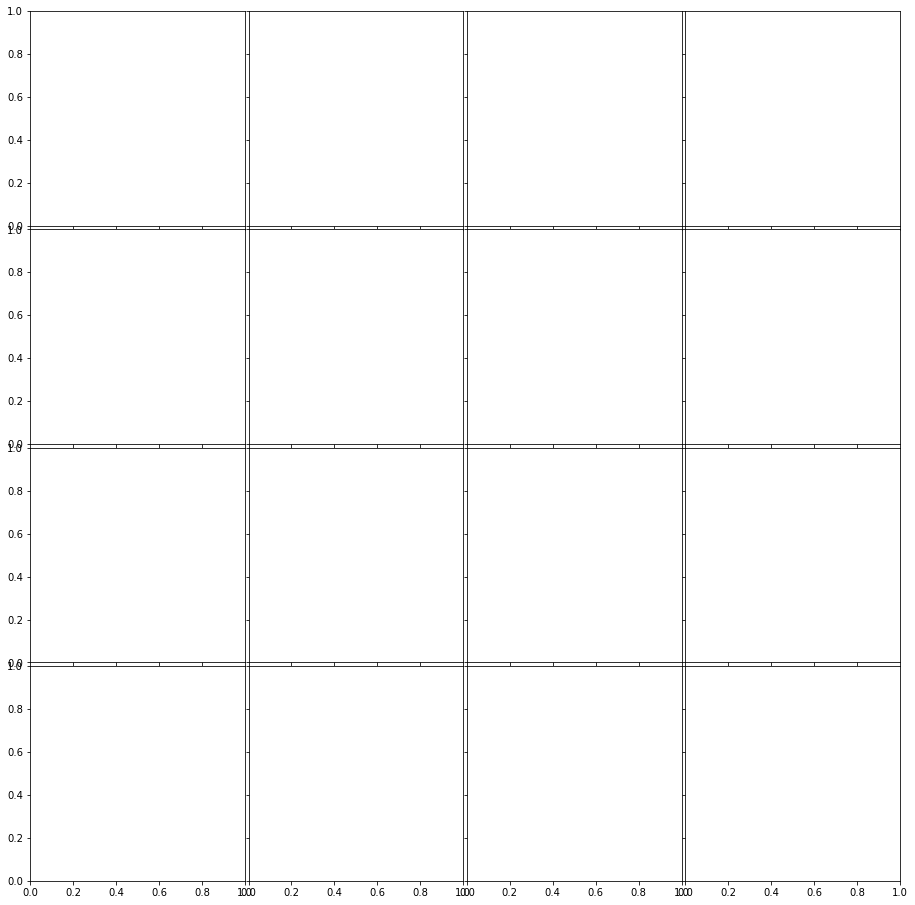

In [14]:
model = ResNet50(weights='imagenet')
j = int(np.sqrt(NUM_CLASSES))
i = int(np.ceil(1. * NUM_CLASSES / j))
fig = plt.figure(1, figsize=(16, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(i, j), axes_pad=0.05)
for i, (img_id, breed) in enumerate(labels.loc[labels['rank'] == 1, ['id', 'breed']].values):
    ax = grid[i]
    img = read_img(img_id, 'train', (224, 224))
    ax.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    preds = model.predict(x)
    _, imagenet_class_name, prob = decode_predictions(preds, top=1)[0][0]
    ax.text(10, 180, 'ResNet50: %s (%.2f)' % (imagenet_class_name , prob), color='w', backgroundcolor='k', alpha=0.8)
    ax.text(10, 200, 'LABEL: %s' % breed, color='k', backgroundcolor='w', alpha=0.8)
    ax.axis('off')
plt.show()

Preprocessing and prediction seems to be working. 75% accuracy on these 16 images.

# Extract VGG16 bottleneck features

In [15]:
INPUT_SIZE = 224
POOLING = 'avg'
x_train = np.zeros((len(labels), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
#print(x_train)
for i, img_id in tqdm(enumerate(labels['id'])):
    img = read_img(img_id, 'train', (INPUT_SIZE, INPUT_SIZE))
    #print(img.shape)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    #print(x.shape)
    x_train[i] = x
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))

1777it [00:19, 92.19it/s] 

Train Images shape: (1777, 224, 224, 3) size: 267,488,256


In [16]:
Xtr = x_train[train_idx]
Xv = x_train[valid_idx]
print((Xtr.shape, Xv.shape, ytr.shape, yv.shape))
vgg_bottleneck = VGG16(weights='imagenet', include_top=False, pooling=POOLING)
train_vgg_bf = vgg_bottleneck.predict(Xtr, batch_size=32, verbose=1)
valid_vgg_bf = vgg_bottleneck.predict(Xv, batch_size=32, verbose=1)
print('VGG train bottleneck features shape: {} size: {:,}'.format(train_vgg_bf.shape, train_vgg_bf.size))
print('VGG valid bottleneck features shape: {} size: {:,}'.format(valid_vgg_bf.shape, valid_vgg_bf.size))

((1427, 224, 224, 3), (350, 224, 224, 3), (1427, 16), (350, 16))
350/350 [==============================] - 2s 4ms/step
VGG train bottleneck features shape: (1427, 512) size: 730,624
VGG valid bottleneck features shape: (350, 512) size: 179,200


# LogReg on VGG bottleneck features


In [17]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=SEED,max_iter = 4000)
logreg.fit(train_vgg_bf, (ytr * range(NUM_CLASSES)).sum(axis=1))
valid_probs = logreg.predict_proba(valid_vgg_bf)
valid_preds = logreg.predict(valid_vgg_bf)


In [18]:
print('Validation VGG LogLoss {}'.format(log_loss(yv, valid_probs)))
print('Validation VGG Accuracy {}'.format(accuracy_score((yv * range(NUM_CLASSES)).sum(axis=1), valid_preds)))

Validation VGG LogLoss 0.27609626111880503
Validation VGG Accuracy 0.9257142857142857


Not bad, 90% accuracy for the top 16 classes. The multiclass classification with 120 classes is more difficult so these LogLoss/Accuracy scores does not translate to LB.

# Extract Xception bottleneck features

In [19]:
INPUT_SIZE = 299
POOLING = 'avg'
x_train = np.zeros((len(labels), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
for i, img_id in tqdm(enumerate(labels['id'])):
    img = read_img(img_id, 'train', (INPUT_SIZE, INPUT_SIZE))
    x = xception.preprocess_input(np.expand_dims(img.copy(), axis=0))
    x_train[i] = x
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))

1777it [00:15, 111.35it/s]

Train Images shape: (1777, 299, 299, 3) size: 476,596,731


In [20]:
Xtr = x_train[train_idx]
Xv = x_train[valid_idx]
print((Xtr.shape, Xv.shape, ytr.shape, yv.shape))
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)
train_x_bf = xception_bottleneck.predict(Xtr, batch_size=32, verbose=1)
valid_x_bf = xception_bottleneck.predict(Xv, batch_size=32, verbose=1)
print('Xception train bottleneck features shape: {} size: {:,}'.format(train_x_bf.shape, train_x_bf.size))
print('Xception valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf.shape, valid_x_bf.size))

((1427, 299, 299, 3), (350, 299, 299, 3), (1427, 16), (350, 16))
350/350 [==============================] - 3s 9ms/step
Xception train bottleneck features shape: (1427, 2048) size: 2,922,496
Xception valid bottleneck features shape: (350, 2048) size: 716,800


# LogReg on Xception bottleneck features¶

In [21]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=SEED,max_iter = 4000)
logreg.fit(train_x_bf, (ytr * range(NUM_CLASSES)).sum(axis=1))
valid_probs = logreg.predict_proba(valid_x_bf)
valid_preds = logreg.predict(valid_x_bf)
print('Validation Xception LogLoss {}'.format(log_loss(yv, valid_probs)))
print('Validation Xception Accuracy {}'.format(accuracy_score((yv * range(NUM_CLASSES)).sum(axis=1), valid_preds)))

Validation Xception LogLoss 0.05309254624124788
Validation Xception Accuracy 0.9857142857142858


# Extract Inception bottleneck features

In [22]:
Xtr = x_train[train_idx]
Xv = x_train[valid_idx]
print((Xtr.shape, Xv.shape, ytr.shape, yv.shape))
inception_bottleneck = inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling=POOLING)
train_i_bf = inception_bottleneck.predict(Xtr, batch_size=32, verbose=1)
valid_i_bf = inception_bottleneck.predict(Xv, batch_size=32, verbose=1)
print('InceptionV3 train bottleneck features shape: {} size: {:,}'.format(train_i_bf.shape, train_i_bf.size))
print('InceptionV3 valid bottleneck features shape: {} size: {:,}'.format(valid_i_bf.shape, valid_i_bf.size))

((1427, 299, 299, 3), (350, 299, 299, 3), (1427, 16), (350, 16))
350/350 [==============================] - 2s 6ms/step
InceptionV3 train bottleneck features shape: (1427, 2048) size: 2,922,496
InceptionV3 valid bottleneck features shape: (350, 2048) size: 716,800


# LogReg on Inception bottleneck features

In [23]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=SEED,max_iter = 4000)
logreg.fit(train_i_bf, (ytr * range(NUM_CLASSES)).sum(axis=1))
valid_probs = logreg.predict_proba(valid_i_bf)
valid_preds = logreg.predict(valid_i_bf)

In [24]:
print('Validation Inception LogLoss {}'.format(log_loss(yv, valid_probs)))
print('Validation Inception Accuracy {}'.format(accuracy_score((yv * range(NUM_CLASSES)).sum(axis=1), valid_preds)))

Validation Inception LogLoss 0.05117697932677419
Validation Inception Accuracy 0.98


In [25]:
X = np.hstack([train_x_bf, train_i_bf])
V = np.hstack([valid_x_bf, valid_i_bf])
print('Full train bottleneck features shape: {} size: {:,}'.format(X.shape, X.size))
print('Full valid bottleneck features shape: {} size: {:,}'.format(V.shape, V.size))
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=SEED,max_iter = 4000)
logreg.fit(X, (ytr * range(NUM_CLASSES)).sum(axis=1))
valid_probs = logreg.predict_proba(V)
valid_preds = logreg.predict(V)
print('Validation Xception + Inception LogLoss {}'.format(log_loss(yv, valid_probs)))
print('Validation Xception + Inception Accuracy {}'.format(accuracy_score((yv * range(NUM_CLASSES)).sum(axis=1), valid_preds)))

Full train bottleneck features shape: (1427, 4096) size: 5,844,992
Full valid bottleneck features shape: (350, 4096) size: 1,433,600
Validation Xception + Inception LogLoss 0.03788047121254981
Validation Xception + Inception Accuracy 0.9914285714285714


# LogReg on all bottleneck features

In [29]:
X = np.hstack([train_x_bf, train_i_bf])
V = np.hstack([valid_x_bf, valid_i_bf])
print('Full train bottleneck features shape: {} size: {:,}'.format(X.shape, X.size))
print('Full valid bottleneck features shape: {} size: {:,}'.format(V.shape, V.size))
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=SEED)
logreg.fit(X, (ytr * range(NUM_CLASSES)).sum(axis=1))
valid_probs = logreg.predict_proba(V)
valid_preds = logreg.predict(V)
print('Validation Xception + Inception LogLoss {}'.format(log_loss(yv, valid_probs)))
print('Validation Xception + Inception Accuracy {}'.format(accuracy_score((yv * range(NUM_CLASSES)).sum(axis=1), valid_preds))) 

Full train bottleneck features shape: (1427, 4096) size: 5,844,992
Full valid bottleneck features shape: (350, 4096) size: 1,433,600
Validation Xception + Inception LogLoss 0.037874346407701785
Validation Xception + Inception Accuracy 0.9914285714285714


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Check errors

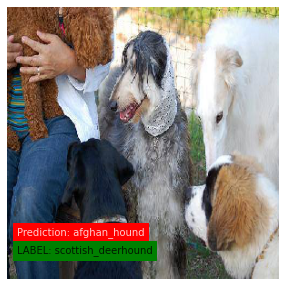

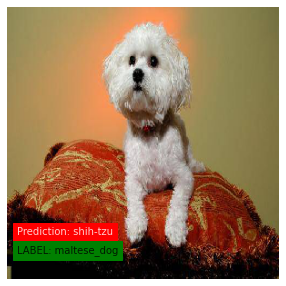

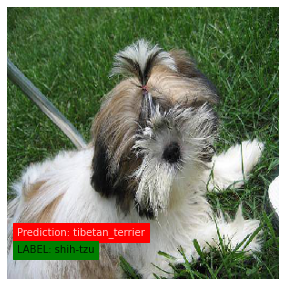

In [27]:
valid_breeds = (yv * range(NUM_CLASSES)).sum(axis=1)
error_idx = (valid_breeds != valid_preds)
for img_id, breed, pred in zip(labels.loc[valid_idx, 'id'].values[error_idx],
                                [selected_breed_list[int(b)] for b in valid_preds[error_idx]],
                                [selected_breed_list[int(b)] for b in valid_breeds[error_idx]]):
    fig, ax = plt.subplots(figsize=(5,5))
    img = read_img(img_id, 'train', (299, 299))
    ax.imshow(img / 255.)
    ax.text(10, 250, 'Prediction: %s' % pred, color='w', backgroundcolor='r', alpha=0.8)
    ax.text(10, 270, 'LABEL: %s' % breed, color='k', backgroundcolor='g', alpha=0.8)
    ax.axis('off')
    plt.show()     

In [28]:
end = dt.datetime.now()
print('Total time {} s.'.format((end - start).seconds))
print('We almost used the one hour time limit.')

NameError: name 'start' is not defined